https://www.kaggle.com/c/bike-sharing-demand/data?select=train.csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

train = pd.read_csv('bike_train.csv')
test = pd.read_csv('bike_test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
print(train.isnull().sum())

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64


In [18]:
train['datetime'] = pd.to_datetime(train['datetime'])

train['datetime-year'] = train['datetime'].dt.year
train['datetime-month'] = train['datetime'].dt.month
train['datetime-day'] = train['datetime'].dt.day
train['datetime-hour'] = train['datetime'].dt.hour
train['datetime-minute'] = train['datetime'].dt.minute
train['datetime-second'] = train['datetime'].dt.second

train[['datetime-year', 'datetime-month', 'datetime-day', 'datetime-hour', 
'datetime-minute', 'datetime-second']].head(20)

,datetime-year,datetime-month,datetime-day,datetime-hour,datetime-minute,datetime-second
0,2011,1,1,0,0,0
1,2011,1,1,1,0,0
2,2011,1,1,2,0,0
3,2011,1,1,3,0,0
4,2011,1,1,4,0,0
5,2011,1,1,5,0,0
6,2011,1,1,6,0,0
7,2011,1,1,7,0,0
8,2011,1,1,8,0,0
9,2011,1,1,9,0,0


In [10]:
for col in train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(train[col].isnull().sum()/train[col].shape[0]))
    print(msg)

column:   datetime	 Percent of NaN value: 0.00%
column:     season	 Percent of NaN value: 0.00%
column:    holiday	 Percent of NaN value: 0.00%
column: workingday	 Percent of NaN value: 0.00%
column:    weather	 Percent of NaN value: 0.00%
column:       temp	 Percent of NaN value: 0.00%
column:      atemp	 Percent of NaN value: 0.00%
column:   humidity	 Percent of NaN value: 0.00%
column:  windspeed	 Percent of NaN value: 0.00%
column:     casual	 Percent of NaN value: 0.00%
column: registered	 Percent of NaN value: 0.00%
column:      count	 Percent of NaN value: 0.00%


<AxesSubplot:>

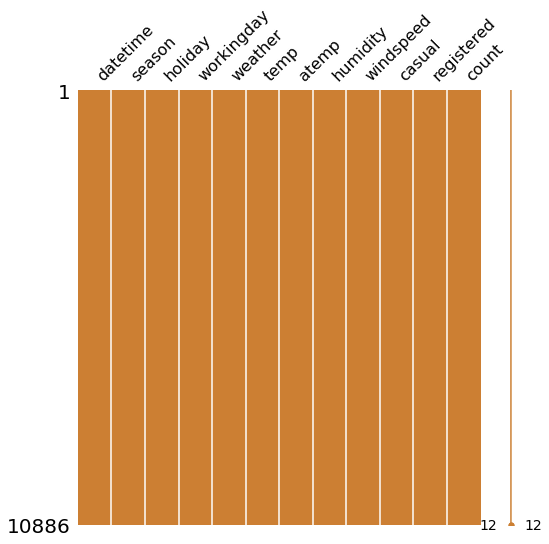

In [11]:
import missingno as msno

msno.matrix(df=train.iloc[:,:], figsize = (8,8), color=(0.8, 0.5, 0.2))

<AxesSubplot:>

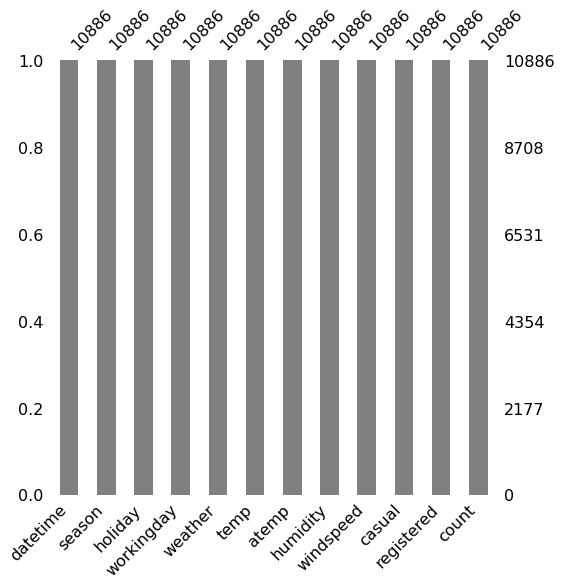

In [12]:
msno.bar(df=train.iloc[:,:], figsize = (8,8), color=(0.5, 0.5, 0.5))

<AxesSubplot:>

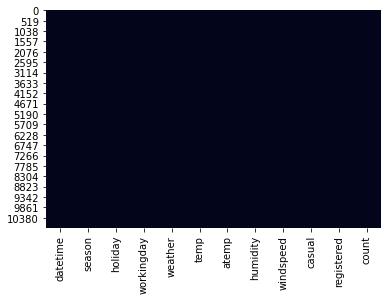

In [13]:
sns.heatmap(train.isnull(), cbar=False)

<AxesSubplot:xlabel='datetime-second', ylabel='count'>

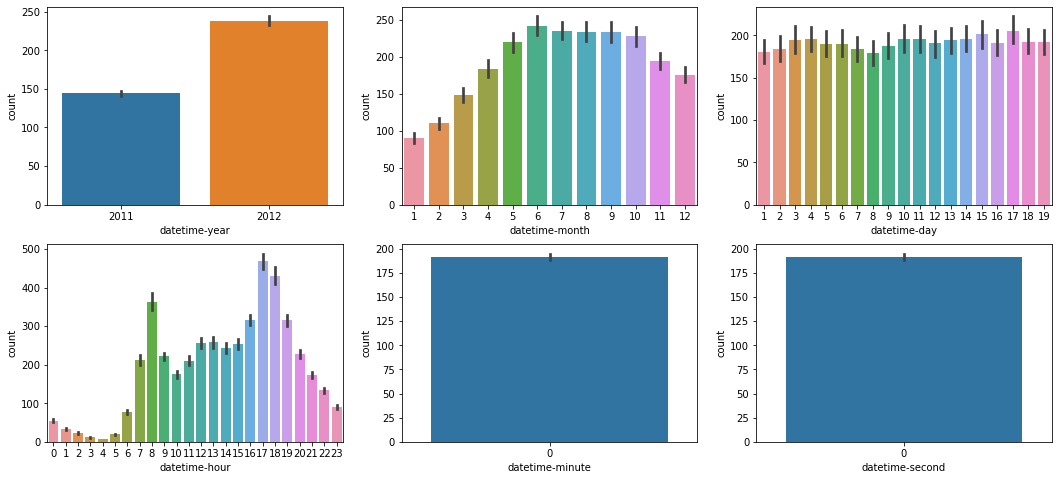

In [15]:
figure, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,8)
sns.barplot(data=train, x='datetime-year', y='count', ax=ax1)
sns.barplot(data=train, x='datetime-month', y='count', ax=ax2)
sns.barplot(data=train, x='datetime-day', y='count', ax=ax3)
sns.barplot(data=train, x='datetime-hour', y='count', ax=ax4)
sns.barplot(data=train, x='datetime-minute', y='count', ax=ax5)
sns.barplot(data=train, x='datetime-second', y='count', ax=ax6)


<AxesSubplot:xlabel='weather', ylabel='count'>

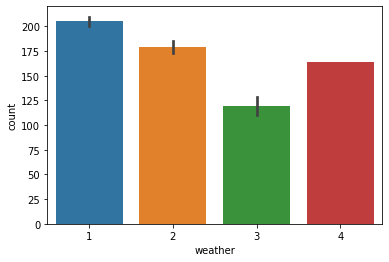

In [19]:
sns.barplot(data=train, x='weather', y='count')

<AxesSubplot:xlabel='weather', ylabel='count'>

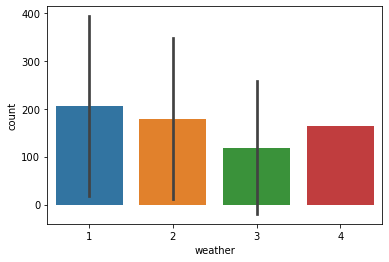

In [20]:
sns.barplot(data=train, x='weather', y='count', ci="sd") # 표준편차

<AxesSubplot:>

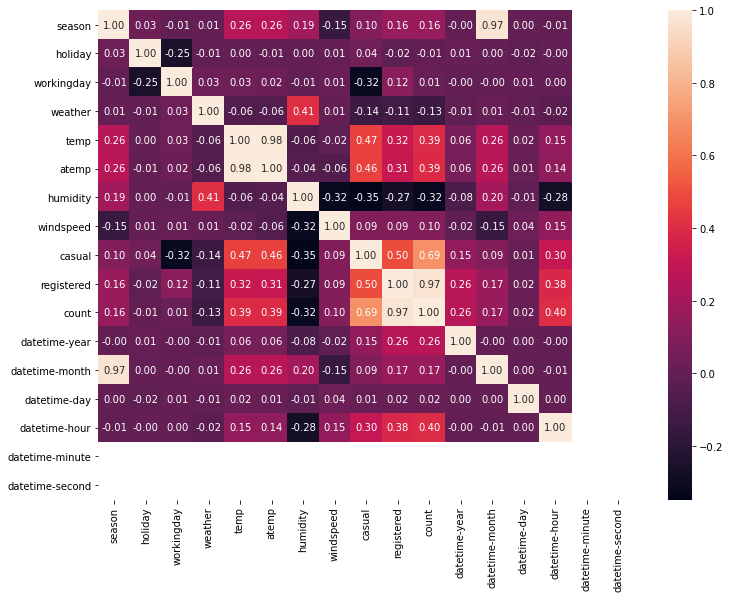

In [21]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, annot=True, fmt='.2f')

<AxesSubplot:xlabel='datetime-hour', ylabel='count'>

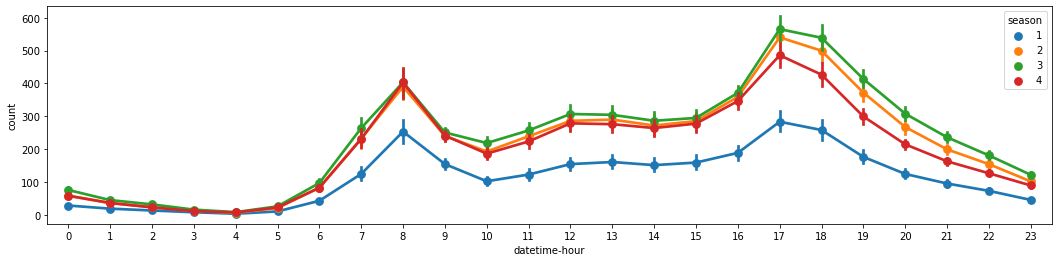

In [22]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x='datetime-hour',y='count',hue='season')


<AxesSubplot:xlabel='datetime-hour', ylabel='count'>

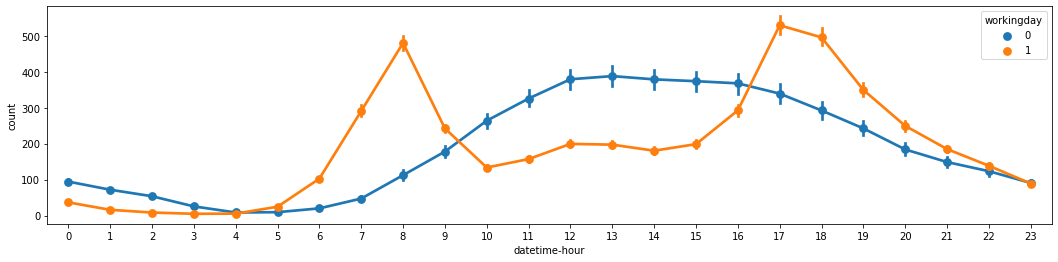

In [23]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x='datetime-hour',y='count',hue='workingday')


<AxesSubplot:xlabel='datetime-hour', ylabel='count'>

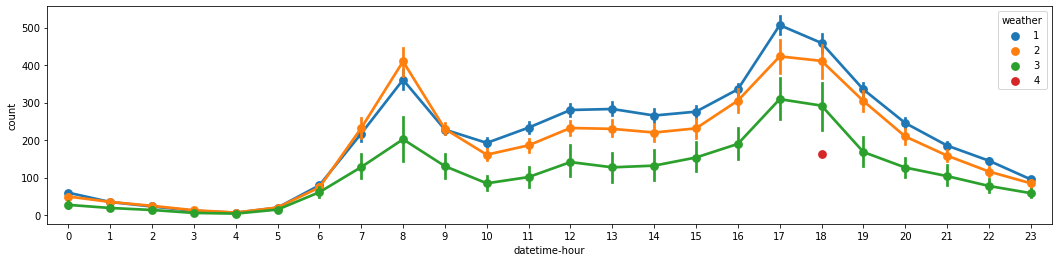

In [29]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x='datetime-hour',y='count',hue='weather')

<AxesSubplot:xlabel='temp', ylabel='count'>

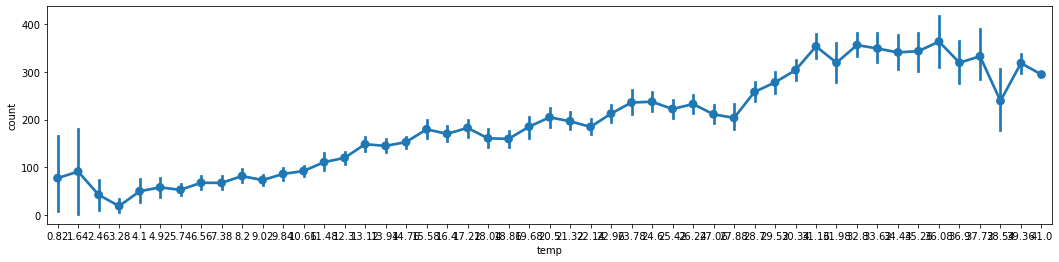

In [31]:
plt.figure(figsize=(18,4))
sns.pointplot(data=train, x='temp',y='count')

In [25]:
train[['weather', 'count']].groupby(['count']).count()

,weather
count,
1,105
2,132
3,144
4,149
5,169
...,...
943,1
948,1
968,1


In [32]:
train[['datetime-year', 'count']].groupby(['datetime-year']).count()

,count
datetime-year,
2011,5422
2012,5464


In [33]:
pd.crosstab(train['weather'], train['datetime-year'], margins=True).style.background_gradient(cmap="summer_r")

datetime-year,2011,2012,All
weather,,,
1,3583,3609,7192
2,1366,1468,2834
3,473,386,859
4,0,1,1
All,5422,5464,10886


<AxesSubplot:xlabel='temp', ylabel='count'>

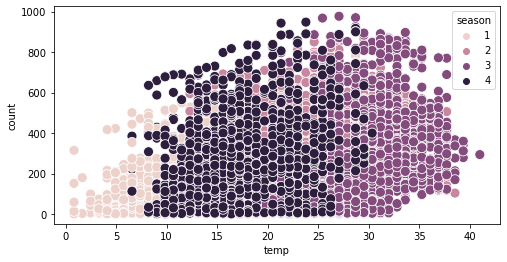

In [57]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=train, x='temp',y='count',hue='season', s=100)

<AxesSubplot:xlabel='windspeed', ylabel='count'>

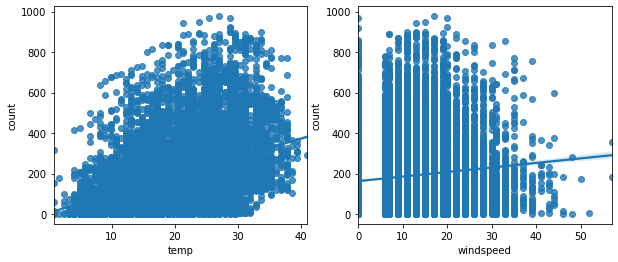

In [53]:
fig, (ax0, ax1) = plt.subplots(ncols = 2, figsize=(10,4))
temp_scatter_plot = pd.concat([train['count'],train['temp']],axis = 1) 
sns.regplot(x='temp',y = 'count',data = temp_scatter_plot,scatter= True, fit_reg=True, ax=ax0) 
windspeed_scatter_plot = pd.concat([train['count'],train['windspeed']],axis = 1) 
sns.regplot(x='windspeed',y = 'count',data = windspeed_scatter_plot,scatter= True, fit_reg=True, ax=ax1)
